In [1]:
import ROOT
import pandas as pd
import numpy as np
import seaborn as sns
from utils import to_data_frame
%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.30/02


In [2]:
%jsroot off
canvas = ROOT.TCanvas("canvas", "canvas", 0, 0, 900, 600);

In [3]:
sns.set_theme(rc={'figure.figsize':(20.7,8.27)})

In [14]:
filename = "/lustre/r3b/ywang/calibration/s515/run49x/millepede/cal.par.root"
root_file = ROOT.TFile(filename, "read")
data_frame = to_data_frame(root_file)

size of module pars: 1000


In [15]:
data_frame

,bar_id,t_diff,t_diff_error,effective_speed,effective_speed_error,t_sync,t_sync_error
0,1,92.439841,3.009984,7.883216,0.187029,0.0,0.0
1,2,90.518306,3.023097,8.428015,0.204839,0.0,0.0
2,3,111.152813,4.058867,8.210727,0.216209,0.0,0.0
3,4,95.398786,3.313616,8.289654,0.208926,0.0,0.0
4,5,96.466017,3.145938,8.077168,0.190688,0.0,0.0
...,...,...,...,...,...,...,...
995,996,-8.604045,0.379633,8.678103,0.178442,0.0,0.0
996,997,-6.421980,0.332186,8.664890,0.181591,0.0,0.0
997,998,-5.934291,0.345609,8.630915,0.190794,0.0,0.0
998,999,-8.995470,0.429552,8.182207,0.184583,0.0,0.0


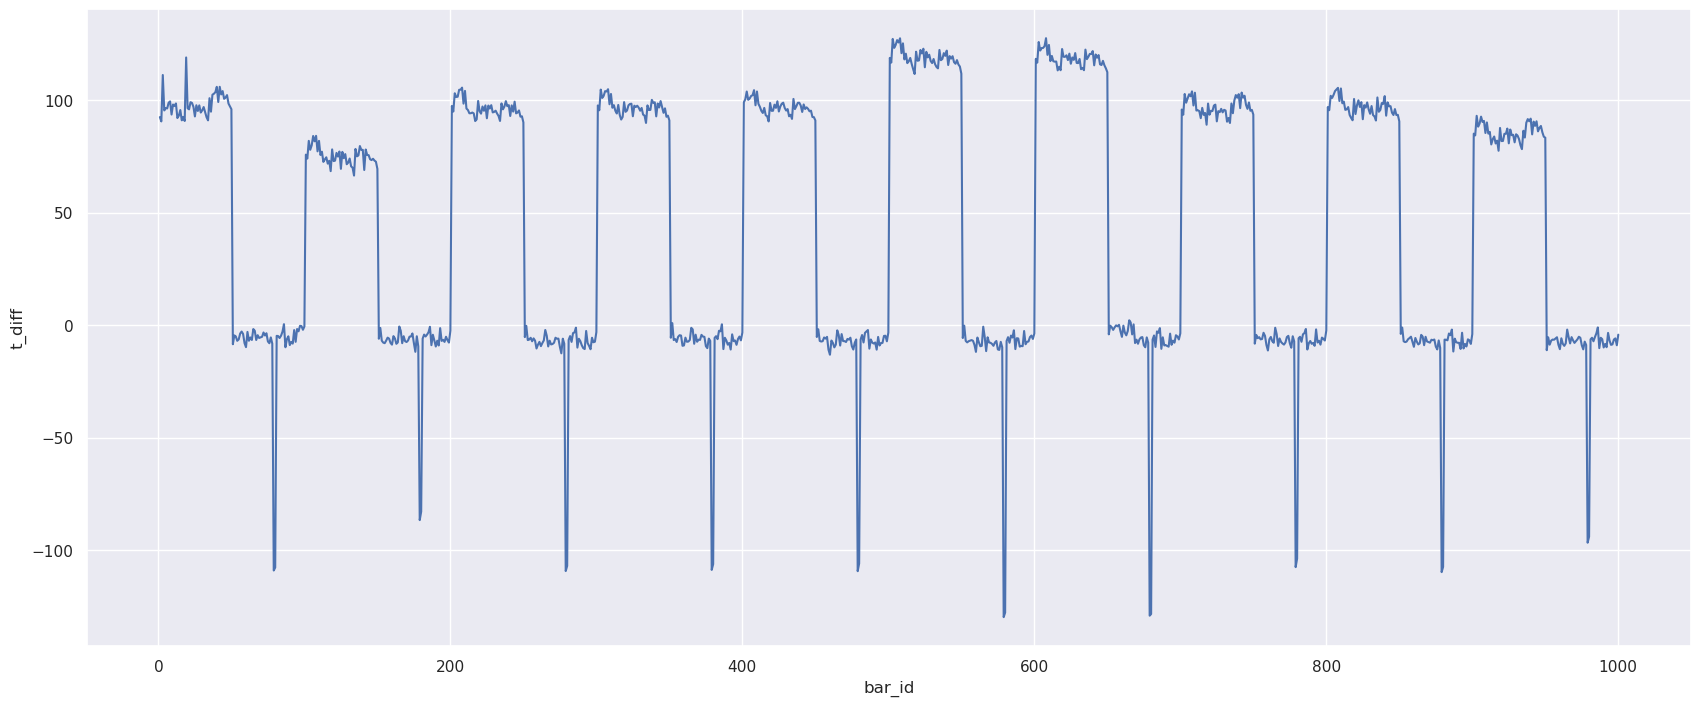

In [16]:
ax = sns.lineplot(data = data_frame, x = "bar_id", y = "t_diff" )
# ax.set(xlim = (0, 1200));

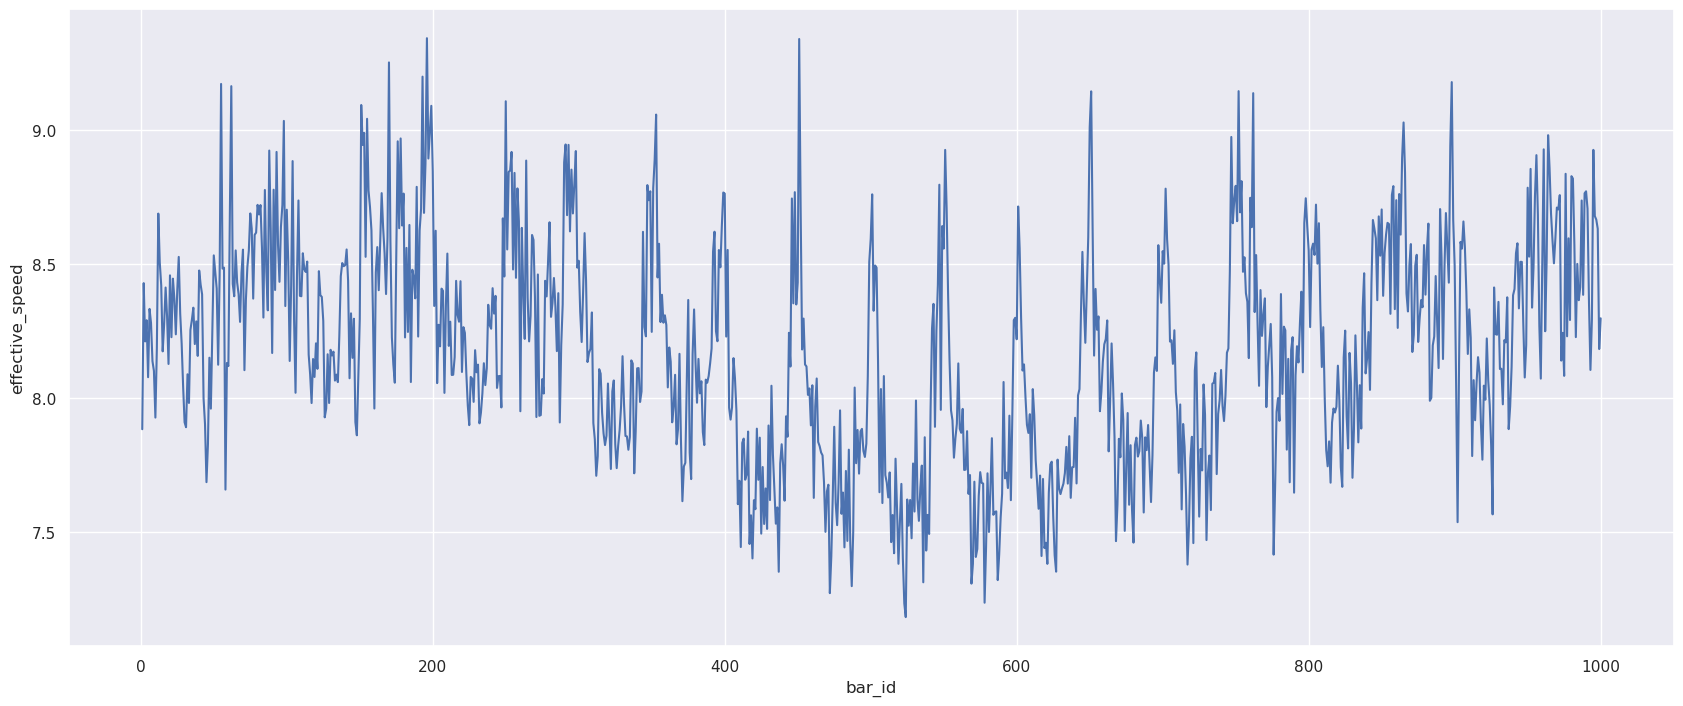

In [17]:
ax = sns.lineplot(data = data_frame, x = "bar_id", y ="effective_speed" )
# ax.set(xlim = (0, 1200));

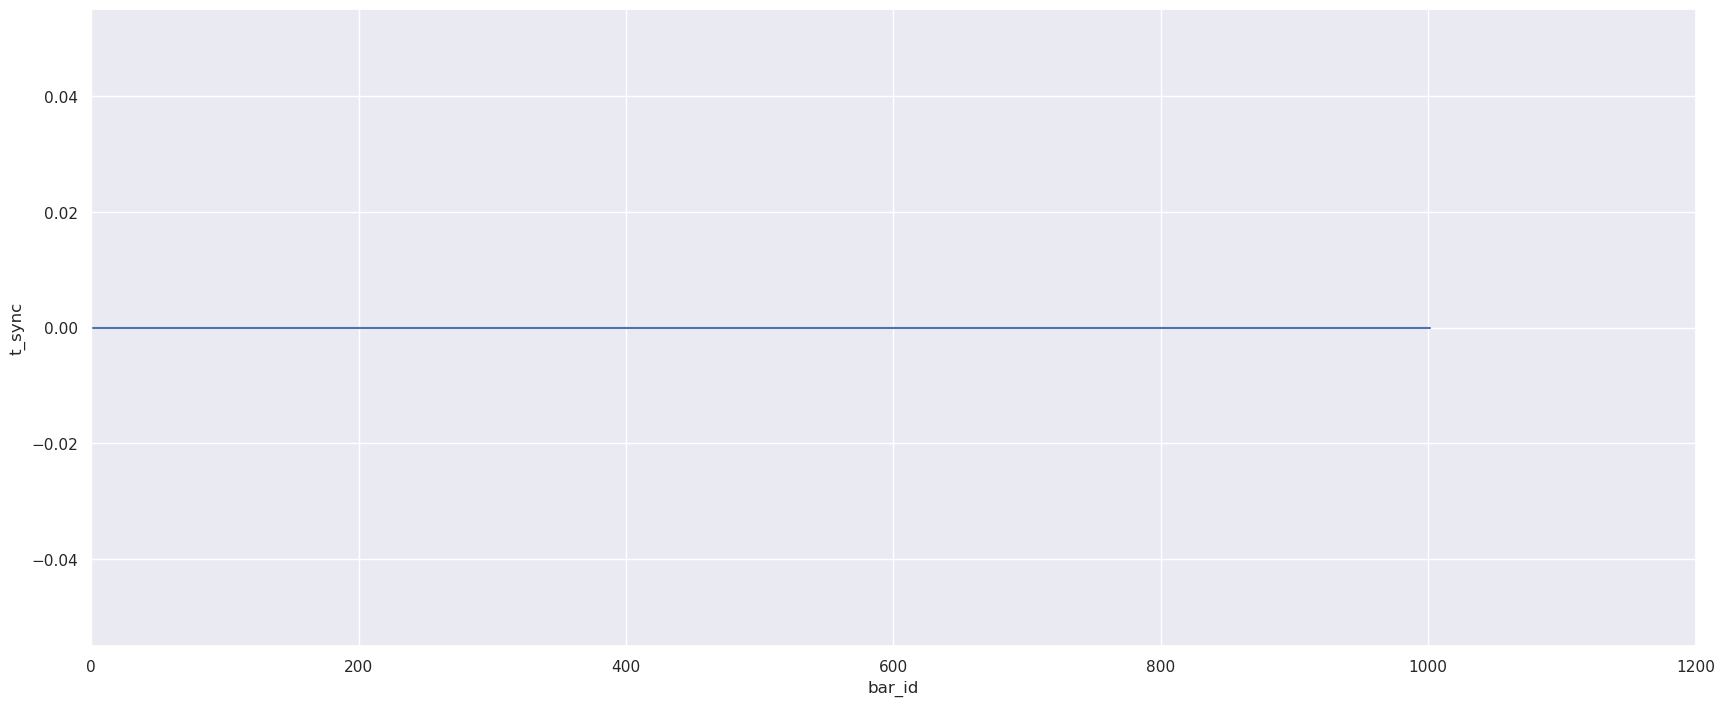

In [8]:
ax = sns.lineplot(data = data_frame, x = "bar_id", y ="t_sync" )
ax.set(xlim = (0, 1200));

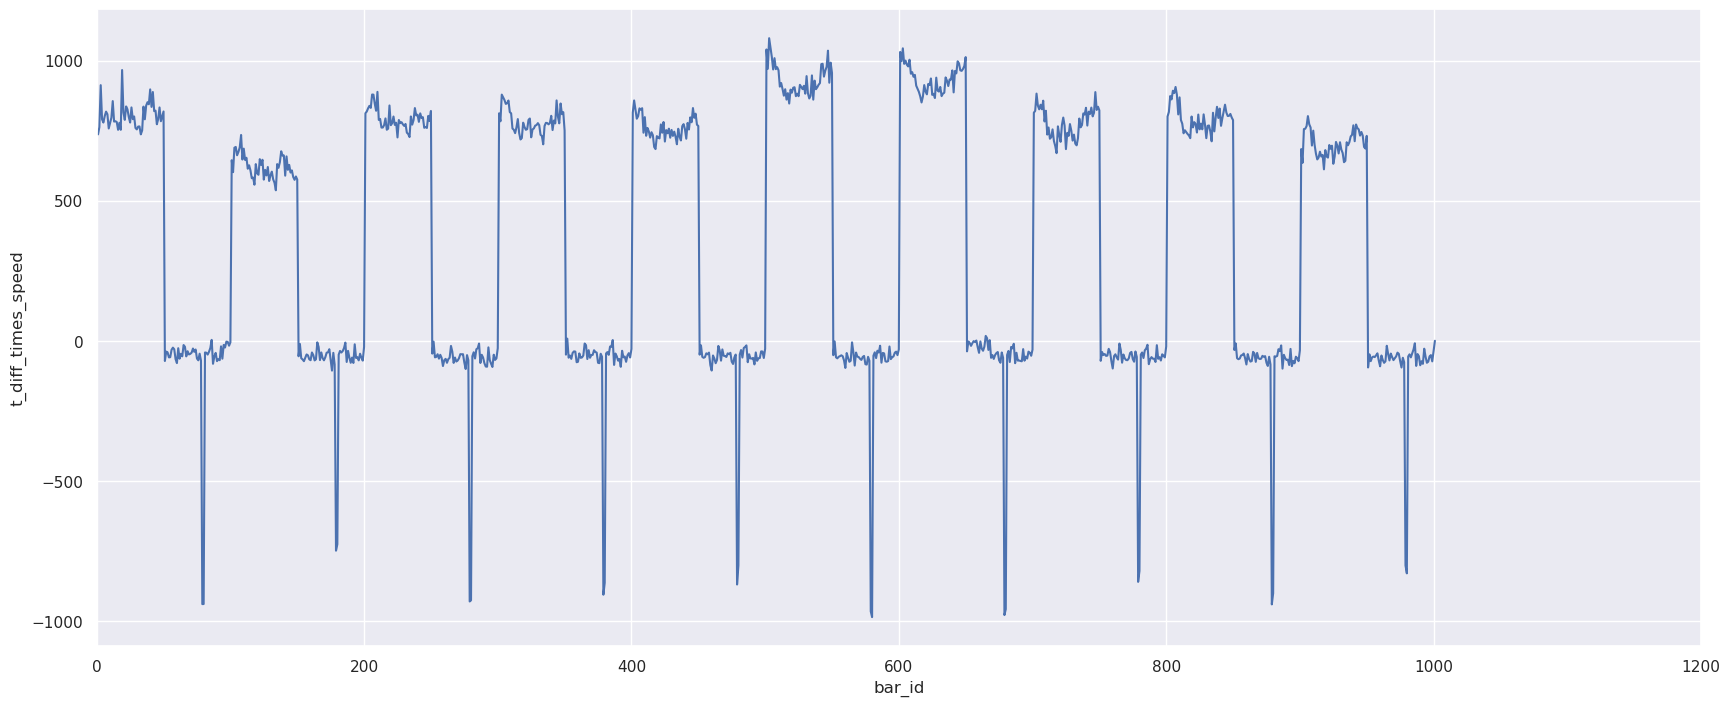

In [9]:
data_frame["t_diff_times_speed"] = data_frame.t_diff * data_frame.effective_speed
ax = sns.lineplot(data = data_frame, x = "bar_id", y ="t_diff_times_speed" )
ax.set(xlim = (0, 1200));

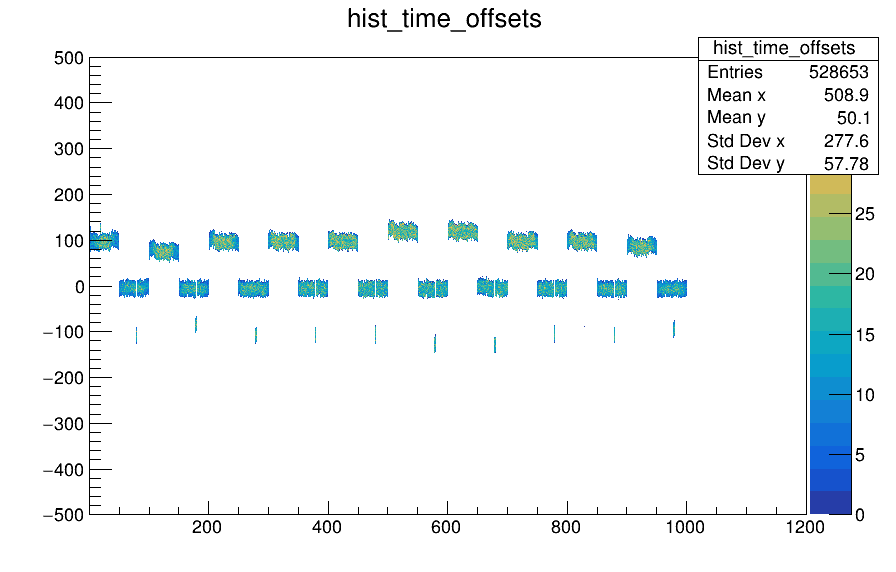

In [10]:
hist_filename = "/lustre/r3b/ywang/calibration/s515/run49x/millepede/cal.root"
hist_file = ROOT.TFile(hist_filename, "read")
hist_folder = hist_file.GetDirectory("HistMonitor/NeulandCal2HitParTask")
hist_time_offsets = hist_folder.Get("hist_time_offsets")
hist_time_offsets.Draw("CLOZ")
canvas.Draw()

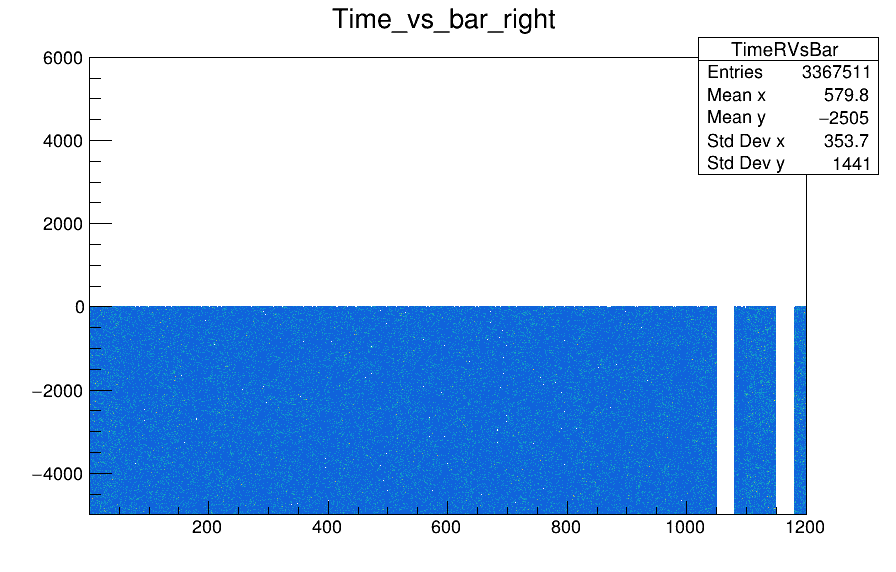

In [11]:
canvas.Clear()
hist_folder2 = hist_file.GetDirectory("HistMonitor/NeulandMapped2Cal")
hist2 = hist_folder2.Get("TimeRVsBar")
hist2.Draw()
canvas.Draw()


In [30]:
effective_c_offset_id = 76
effective_c_id = 1076
t_sub = -0.021

t_diff =data_frame.loc[effective_c_offset_id - 1, "t_diff"] / 100.
speed =data_frame.loc[effective_c_offset_id - 1, "effective_speed"]
print(f"g_c: {speed}")
t_diff_speed = t_diff * speed
print(f"g_ct: {t_diff_speed}")

rmeas = 0 - t_sub * speed + 0.5 * t_diff_speed
print(f"rmeas: {rmeas}")


g_c: 8.631061870729445
g_ct: -0.6973677587121869
rmeas: -0.1674315800707751
